In [51]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt


---
# VIDEO: Concept and uses of the inverse
---


[[  1.00000000e+00   2.13532934e-17   3.42249896e-17]
 [  6.19520180e-16   1.00000000e+00  -8.40012192e-17]
 [  5.69025312e-16   4.56839821e-17   1.00000000e+00]]


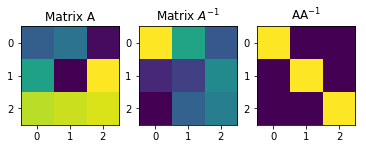

In [15]:
# size of square matrix
m = 3

# generate random matrix
A = np.random.randn(m,m)

# compute its inverse
Ainv = np.linalg.inv(A)

# and check the multiplication
id = A@Ainv

# print the matrix. Note the computer rounding errors on the off-diagonals
print(id)


# show in an image
plt.subplot(131)
plt.imshow(A)
plt.title('Matrix A')

plt.subplot(132)
plt.imshow(Ainv)
plt.title('Matrix $A^{-1}$')

plt.subplot(133)
plt.imshow(id)
plt.title('AA$^{-1}$')

plt.show()


---
# VIDEO: Computing the inverse via row reduction
---


Size of Aaug: (4, 8)


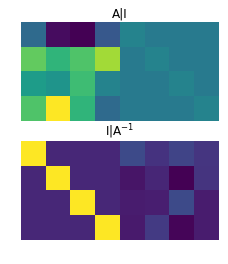

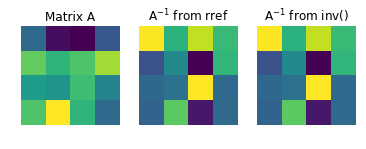

In [172]:
## notice the difference in implementation in this video using sympy, compared to the previous video using numpy ##

# matrix size
m = 4

# random integers matrix
A = Matrix( np.round(10*np.random.randn(m,m)),dtype='float' )

# augment A and identity
Aaug = Matrix( np.concatenate((A,np.eye(m,m)),axis=1) )
print('Size of Aaug:',Aaug.shape)

# rref
Asol = Aaug.rref()
Asol = Asol[0]
Ainvrref = Asol[:,m:m*2]
Ainv = A.inv()

# show the augemented matrices
plt.subplot(211)
plt.imshow(matrix2numpy(Aaug,dtype='float'))
plt.title('A|I'), plt.axis('off')

plt.subplot(212)
plt.imshow(matrix2numpy(Asol,dtype='float'))
plt.title('I|A$^{-1}$'), plt.axis('off')

plt.show()


# show the square matrices
plt.subplot(131)
plt.imshow(matrix2numpy(A,dtype='float'))
plt.title('Matrix A'), plt.axis('off')

plt.subplot(132)
plt.imshow(matrix2numpy(Ainvrref,dtype='float'))
plt.title('A$^{-1}$ from rref'), plt.axis('off')

plt.subplot(133)
plt.imshow(matrix2numpy(Ainv,dtype='float'))
plt.title('A$^{-1}$ from inv()'), plt.axis('off')

plt.show()

In [17]:
#sandbox
from IPython.display import display

#init_printing(use_unicode=True, use_latex='mathjax')
init_printing(use_latex=True)

m = 4
X = np.round(np.random.randn(m,m)*10)
i = np.eye(m)
aug=Matrix(np.hstack((X, i)))
display(aug)

M = Matrix(X)
Mr  =  M.rref()
display(Mr)

Xinv = np.linalg.inv(X)
Minv = Matrix(Xinv)
display(Minv)
print(np.round(np.matmul(X, Xinv), 10))

⎡-22.0   3.0   -1.0  0.0  1.0  0.0  0.0  0.0⎤
⎢                                           ⎥
⎢-2.0   -1.0   11.0  8.0  0.0  1.0  0.0  0.0⎥
⎢                                           ⎥
⎢26.0   -10.0  16.0  3.0  0.0  0.0  1.0  0.0⎥
⎢                                           ⎥
⎣-6.0    5.0   -2.0  0.0  0.0  0.0  0.0  1.0⎦

⎛⎡1  0  0  0⎤              ⎞
⎜⎢          ⎥              ⎟
⎜⎢0  1  0  0⎥              ⎟
⎜⎢          ⎥, (0, 1, 2, 3)⎟
⎜⎢0  0  1  0⎥              ⎟
⎜⎢          ⎥              ⎟
⎝⎣0  0  0  1⎦              ⎠

⎡-0.0532514930325149  -0.000497677504976761  0.0013271400132714  0.03450564034
⎢                                                                             
⎢-0.0235567352355674   -0.0189117451891174   0.0504313205043131  0.31121433311
⎢                                                                             
⎢ 0.100862641008626    -0.0457863304578633   0.122096881220969   0.17451891174
⎢                                                                             
⎣-0.154943596549436     0.185467816854678    -0.161247511612475  -0.1924353019

50564⎤
     ⎥
2143 ⎥
     ⎥
5189 ⎥
     ⎥
24353⎦

[[ 1. -0. -0.  0.]
 [ 0.  1. -0.  0.]
 [ 0.  0.  1.  0.]
 [-0.  0. -0.  1.]]


In [80]:
#coding challenge
#inverse of diagonal matrix
np.set_printoptions(linewidth=100)
np.random.seed(1)
m = 2
X = np.round(np.random.randn(m,m) * 100)

X = np.array([[4, 0],[0, 3]])
X = np.diag(np.diag(X))
display("X", X)
display("Det. X", np.linalg.det(X))
display("Inv. X", np.linalg.inv(X))

Xdiag = np.diag(X)
Xinvdiag = np.diag(np.linalg.inv(X))
display("Xdiag", Xdiag)
display("Xinvdiag", Xinvdiag)
display("Xdiag * Xinvdiag", np.multiply(Xdiag, Xinvdiag))
display("Xdiag / Xinvdiag", np.divide(Xdiag, Xinvdiag))

X = np.diagflat(np.arange(1,11))
display("X", X)
Xinv = np.linalg.inv(X)
display("X inv" , np.round(Xinv, 4))
display("X diag * X inv diag", np.multiply(np.diag(X), np.diag(Xinv)))
display ("X diag / X inv diag", np.divide(np.diag(X), np.diag(Xinv)))

'X'

array([[4, 0],
       [0, 3]])

'Det. X'

'Inv. X'

array([[0.25      , 0.        ],
       [0.        , 0.33333333]])

'Xdiag'

array([4, 3])

'Xinvdiag'

array([0.25      , 0.33333333])

'Xdiag * Xinvdiag'

array([1., 1.])

'Xdiag / Xinvdiag'

array([16.,  9.])

'X'

array([[ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  3,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  4,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  5,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  6,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  7,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  8,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  9,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 10]])

'X inv'

array([[1.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.5   , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.3333, 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.25  , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.2   , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.1667, 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.1429, 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.125 , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.1111, 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.1   ]])

'X diag * X inv diag'

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

'X diag / X inv diag'

array([  1.,   4.,   9.,  16.,  25.,  36.,  49.,  64.,  81., 100.])


---
# VIDEO: Left inverse and right inverse
---


Rank of A^TA: 3
Rank of AA^T: 3


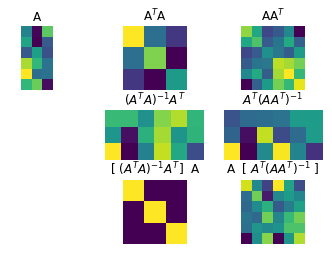

In [184]:
# m>n for left inverse,
# m<n for right inverse
m = 6
n = 3

# create matrices
A = np.random.randn(m,n)
AtA = np.matrix.transpose(A)@A
AAt = A@np.matrix.transpose(A)

# inspect ranks
print('Rank of A^TA:', np.linalg.matrix_rank(AtA) ) 
print('Rank of AA^T:', np.linalg.matrix_rank(AAt) ) 

# left inverse
Aleft = np.linalg.inv(AtA)@np.matrix.transpose(A)

# right inverse
Aright = np.matrix.transpose(A)@np.linalg.inv(AAt)

# now test!
I_left  = Aleft  @ A
I_right = A @ Aright

# and then test using the inverse function
AtA_inv = np.linalg.inv(AtA)
I_AtA   = AtA_inv @ AtA

AAt_inv = np.linalg.inv(AAt)
I_AAt   = AAt_inv @ AAt


## show images
plt.subplot(331)
plt.imshow(A), plt.axis('off')
plt.title('A')

plt.subplot(332)
plt.imshow(AtA), plt.axis('off')
plt.title('A$^T$A')

plt.subplot(333)
plt.imshow(AAt), plt.axis('off')
plt.title('AA$^T$')

plt.subplot(335)
plt.imshow(Aleft), plt.axis('off')
plt.title('$(A^TA)^{-1}A^T$')

plt.subplot(336)
plt.imshow(Aright), plt.axis('off')
plt.title('$A^T(AA^T)^{-1}$')

plt.subplot(338)
plt.imshow(I_left), plt.axis('off')
plt.title('[ $(A^TA)^{-1}A^T ]$  A')

plt.subplot(339)
plt.imshow(I_right), plt.axis('off')
plt.title('A  [ $A^T(AA^T)^{-1}$ ]')

plt.show()


---
# VIDEO: The pseudoinverse, part 1
---


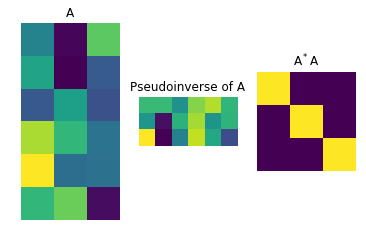

In [200]:
# pseudoinverse of rectangular matrix A

pseudoInvA = np.linalg.pinv(A)

plt.subplot(131)
plt.imshow(A), plt.axis('off')
plt.title('A')

plt.subplot(132)
plt.imshow(pseudoInvA), plt.axis('off')
plt.title('Pseudoinverse of A')

plt.subplot(133)
plt.imshow(pseudoInvA@A), plt.axis('off')
plt.title('A$^*$A')

plt.show()

rank = 49


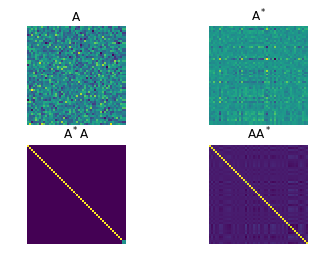

In [215]:

# create random matrix
n = 50
A = np.random.randn(n,n)

# make rank deficient by repeating a column
A[:,n-1] = A[:,n-2]

# rank of A!
print('rank =',np.linalg.matrix_rank(A))


# compute the pseudoinverse
Ai = np.linalg.pinv(A)


# and show the matrices
plt.subplot(221)
plt.imshow(A), plt.axis('off')
plt.title('A')

plt.subplot(222)
plt.imshow(Ai), plt.axis('off')
plt.title('A$^*$')

plt.subplot(223)
plt.imshow(Ai@A), plt.axis('off')
plt.title('A$^*$A')

plt.subplot(224)
plt.imshow(A@Ai), plt.axis('off')
plt.title('AA$^*$')

plt.show()